<a href="https://colab.research.google.com/github/joelsoaresjr/python_strategies/blob/main/Machine_Learning_finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from datetime import date
import yfinance as yf
import seaborn as sns
sns.set(rc={'figure.figsize':(30,14)})

from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.simplefilter("ignore")

In [6]:
coluna = ['BOVA11', 'ITUB4', 'BBDC4', 'B3SA3', 'PETR4', 'ABEV3', 'PETR3', 'ITSA4', 
          'BBAS3']

coluna = sorted(coluna)

ticker = []
for i in range(len(coluna)):
  ticker.append(coluna[i] + '.SA')

In [7]:
volume = []

for i in range(len(coluna)):
  volume.append(coluna[i] + '.Volume')

price = []

for i in range(len(coluna)):
  price.append(coluna[i] + '.Price')


In [8]:
start = date(2015,1,1)
end = date(2021,8,27)

In [9]:
dados_price = yf.download(ticker, start, end)["Adj Close"]

[*********************100%***********************]  9 of 9 completed


In [10]:
dados_price.columns = price

In [11]:
dados_volume = yf.download(ticker, start, end)["Volume"]

[*********************100%***********************]  9 of 9 completed


In [12]:
dados_volume.columns = volume

In [13]:
dados = pd.DataFrame()

for n in range(0, 8):
  dados.insert(n , dados_price.columns[n], dados_price[dados_price.columns[n]])

In [14]:
for n in range(0, 8):
  dados.insert(n , dados_volume.columns[n], dados_volume[dados_volume.columns[n]])

In [15]:
dados

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,BBAS3.Price,BBDC4.Price,BOVA11.Price,ITSA4.Price,ITUB4.Price,PETR3.Price
Date,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,16646325.0,2755220.0,14567668.0,20756703.0,12710900.0,12.619536,2.499021,15.641596,12.181644,47.259998,4.663659,13.784585,7.713806
2015-01-05,13795900.0,34790100.0,5566200.0,16428748.0,963480.0,27743553.0,23532382.0,25730600.0,12.391089,2.430697,15.317019,12.206099,46.320000,4.678918,13.853848,7.088132
2015-01-06,18610500.0,49214700.0,8465900.0,21831909.0,2024030.0,45486782.0,27725577.0,29754600.0,12.863731,2.454347,15.531107,12.607638,46.580002,4.714518,14.077969,6.908143
2015-01-07,20493500.0,24006600.0,4107200.0,23002650.0,1534970.0,26784452.0,23601897.0,34128300.0,13.044909,2.551575,16.214775,13.108670,48.150002,4.892519,14.587290,7.242407
2015-01-08,9054500.0,22967700.0,3085100.0,12495706.0,2070130.0,21225106.0,21403024.0,37487300.0,13.830949,2.517415,16.270021,13.176188,48.509998,4.943378,14.815473,7.730951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,28616800.0,7724065.0,33224600.0,34702500.0,12420500.0,17.540001,14.200000,29.364847,22.620001,113.650002,11.180000,29.790001,27.150000
2021-08-23,17262100.0,36205000.0,18878500.0,29032800.0,5013969.0,25096300.0,21529700.0,21931900.0,17.360001,13.650000,29.631712,22.780001,113.050003,11.230000,30.110001,28.059999
2021-08-24,18073900.0,33260300.0,15528800.0,37188400.0,7336760.0,20322500.0,30154700.0,9774200.0,17.590000,13.900000,30.600000,23.379999,115.629997,11.470000,30.950001,28.379999


In [16]:
data = dados.copy()

In [17]:
data[data.columns[8:]] = data[data.columns[8:]].pct_change()

In [18]:
data

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,BBAS3.Price,BBDC4.Price,BOVA11.Price,ITSA4.Price,ITUB4.Price,PETR3.Price
Date,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,16646325.0,2755220.0,14567668.0,20756703.0,12710900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,13795900.0,34790100.0,5566200.0,16428748.0,963480.0,27743553.0,23532382.0,25730600.0,-0.018103,-0.027340,-0.020751,0.002007,-0.019890,0.003272,0.005025,-0.081111
2015-01-06,18610500.0,49214700.0,8465900.0,21831909.0,2024030.0,45486782.0,27725577.0,29754600.0,0.038144,0.009730,0.013977,0.032897,0.005613,0.007608,0.016177,-0.025393
2015-01-07,20493500.0,24006600.0,4107200.0,23002650.0,1534970.0,26784452.0,23601897.0,34128300.0,0.014084,0.039614,0.044019,0.039740,0.033705,0.037756,0.036179,0.048387
2015-01-08,9054500.0,22967700.0,3085100.0,12495706.0,2070130.0,21225106.0,21403024.0,37487300.0,0.060256,-0.013388,0.003407,0.005151,0.007477,0.010395,0.015643,0.067456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,28616800.0,7724065.0,33224600.0,34702500.0,12420500.0,0.020361,0.001410,0.001348,-0.005714,0.007089,0.001792,-0.003679,-0.000368
2021-08-23,17262100.0,36205000.0,18878500.0,29032800.0,5013969.0,25096300.0,21529700.0,21931900.0,-0.010262,-0.038732,0.009088,0.007073,-0.005279,0.004472,0.010742,0.033517
2021-08-24,18073900.0,33260300.0,15528800.0,37188400.0,7336760.0,20322500.0,30154700.0,9774200.0,0.013249,0.018315,0.032677,0.026339,0.022822,0.021371,0.027898,0.011404


In [19]:
volatilidade = []

for i in range(len(coluna)):
  volatilidade.append(coluna[i] + '.Volatilidade')

In [20]:
for i, name in enumerate(volatilidade):
  data[name] =  data[data.columns[i+8]].rolling(21).std() * np.sqrt(252)

In [21]:
data

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,BBAS3.Price,BBDC4.Price,BOVA11.Price,ITSA4.Price,ITUB4.Price,PETR3.Price,ABEV3.Volatilidade,B3SA3.Volatilidade,BBAS3.Volatilidade,BBDC4.Volatilidade,BOVA11.Volatilidade,ITSA4.Volatilidade,ITUB4.Volatilidade,PETR3.Volatilidade,PETR4.Volatilidade
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,16646325.0,2755220.0,14567668.0,20756703.0,12710900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,13795900.0,34790100.0,5566200.0,16428748.0,963480.0,27743553.0,23532382.0,25730600.0,-0.018103,-0.027340,-0.020751,0.002007,-0.019890,0.003272,0.005025,-0.081111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,18610500.0,49214700.0,8465900.0,21831909.0,2024030.0,45486782.0,27725577.0,29754600.0,0.038144,0.009730,0.013977,0.032897,0.005613,0.007608,0.016177,-0.025393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,20493500.0,24006600.0,4107200.0,23002650.0,1534970.0,26784452.0,23601897.0,34128300.0,0.014084,0.039614,0.044019,0.039740,0.033705,0.037756,0.036179,0.048387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,9054500.0,22967700.0,3085100.0,12495706.0,2070130.0,21225106.0,21403024.0,37487300.0,0.060256,-0.013388,0.003407,0.005151,0.007477,0.010395,0.015643,0.067456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,28616800.0,7724065.0,33224600.0,34702500.0,12420500.0,0.020361,0.001410,0.001348,-0.005714,0.007089,0.001792,-0.003679,-0.000368,0.308303,0.469557,0.229687,0.222072,0.178864,0.219740,0.244583,0.415639,0.329518
2021-08-23,17262100.0,36205000.0,18878500.0,29032800.0,5013969.0,25096300.0,21529700.0,21931900.0,-0.010262,-0.038732,0.009088,0.007073,-0.005279,0.004472,0.010742,0.033517,0.304470,0.482505,0.233525,0.223093,0.177240,0.220056,0.246149,0.425538,0.301583
2021-08-24,18073900.0,33260300.0,15528800.0,37188400.0,7336760.0,20322500.0,30154700.0,9774200.0,0.013249,0.018315,0.032677,0.026339,0.022822,0.021371,0.027898,0.011404,0.300043,0.489626,0.256856,0.241783,0.194992,0.229752,0.256720,0.422502,0.238220


In [22]:
data['alvo'] = dados['BOVA11.Price'].shift(1)

In [23]:
data

,ABEV3.Volume,B3SA3.Volume,BBAS3.Volume,BBDC4.Volume,BOVA11.Volume,ITSA4.Volume,ITUB4.Volume,PETR3.Volume,ABEV3.Price,B3SA3.Price,BBAS3.Price,BBDC4.Price,BOVA11.Price,ITSA4.Price,ITUB4.Price,PETR3.Price,ABEV3.Volatilidade,B3SA3.Volatilidade,BBAS3.Volatilidade,BBDC4.Volatilidade,BOVA11.Volatilidade,ITSA4.Volatilidade,ITUB4.Volatilidade,PETR3.Volatilidade,PETR4.Volatilidade,alvo
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,19396500.0,21734100.0,4750400.0,16646325.0,2755220.0,14567668.0,20756703.0,12710900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,13795900.0,34790100.0,5566200.0,16428748.0,963480.0,27743553.0,23532382.0,25730600.0,-0.018103,-0.027340,-0.020751,0.002007,-0.019890,0.003272,0.005025,-0.081111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.259998
2015-01-06,18610500.0,49214700.0,8465900.0,21831909.0,2024030.0,45486782.0,27725577.0,29754600.0,0.038144,0.009730,0.013977,0.032897,0.005613,0.007608,0.016177,-0.025393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.320000
2015-01-07,20493500.0,24006600.0,4107200.0,23002650.0,1534970.0,26784452.0,23601897.0,34128300.0,0.014084,0.039614,0.044019,0.039740,0.033705,0.037756,0.036179,0.048387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.580002
2015-01-08,9054500.0,22967700.0,3085100.0,12495706.0,2070130.0,21225106.0,21403024.0,37487300.0,0.060256,-0.013388,0.003407,0.005151,0.007477,0.010395,0.015643,0.067456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,34873200.0,31296800.0,10487200.0,28616800.0,7724065.0,33224600.0,34702500.0,12420500.0,0.020361,0.001410,0.001348,-0.005714,0.007089,0.001792,-0.003679,-0.000368,0.308303,0.469557,0.229687,0.222072,0.178864,0.219740,0.244583,0.415639,0.329518,112.849998
2021-08-23,17262100.0,36205000.0,18878500.0,29032800.0,5013969.0,25096300.0,21529700.0,21931900.0,-0.010262,-0.038732,0.009088,0.007073,-0.005279,0.004472,0.010742,0.033517,0.304470,0.482505,0.233525,0.223093,0.177240,0.220056,0.246149,0.425538,0.301583,113.650002
2021-08-24,18073900.0,33260300.0,15528800.0,37188400.0,7336760.0,20322500.0,30154700.0,9774200.0,0.013249,0.018315,0.032677,0.026339,0.022822,0.021371,0.027898,0.011404,0.300043,0.489626,0.256856,0.241783,0.194992,0.229752,0.256720,0.422502,0.238220,113.050003


In [24]:
data.dropna(inplace = True)

In [25]:
 data['alvo']

Date
2015-03-04     49.830002
2015-03-05     49.070000
2015-03-06     48.950001
2015-03-09     48.549999
2015-03-10     47.750000
                 ...    
2021-08-20    112.849998
2021-08-23    113.650002
2021-08-24    113.050003
2021-08-25    115.629997
2021-08-26    116.139999
Name: alvo, Length: 1605, dtype: float64

In [26]:
alvo_treinamento = data['alvo'][: '2020-12-31']

In [27]:
previsores_treinamento = data.iloc[: , :25][: '2020-12-31']

In [28]:
alvo_teste = data['alvo']['2020-12-31':]

In [29]:
previsores_teste = data.iloc[: , :25]['2020-12-31':]

In [30]:
scaler = MinMaxScaler()

In [31]:
previsores_treinamento_scaler = scaler.fit_transform(previsores_treinamento)

In [32]:
previsores_teste_scaler = scaler.transform(previsores_teste)

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(previsores_treinamento_scaler , alvo_treinamento)
score = regressor.score(previsores_treinamento_scaler , alvo_treinamento)

In [34]:
previsoes = pd.DataFrame(regressor.predict(previsores_teste))

In [73]:
def trade_1(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Arvore com Regressão'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Arvore com Regressão'] = (1 + trade['Retornos Arvore com Regressão']).cumprod()
  trade['Retorno Acum Arvore com Regressão'][0] = 1

  trade.index = alvo_teste.index

  return trade




In [74]:
arvore_regressao = trade_1(previsoes)

In [ ]:
arvore_regressao.head(50)

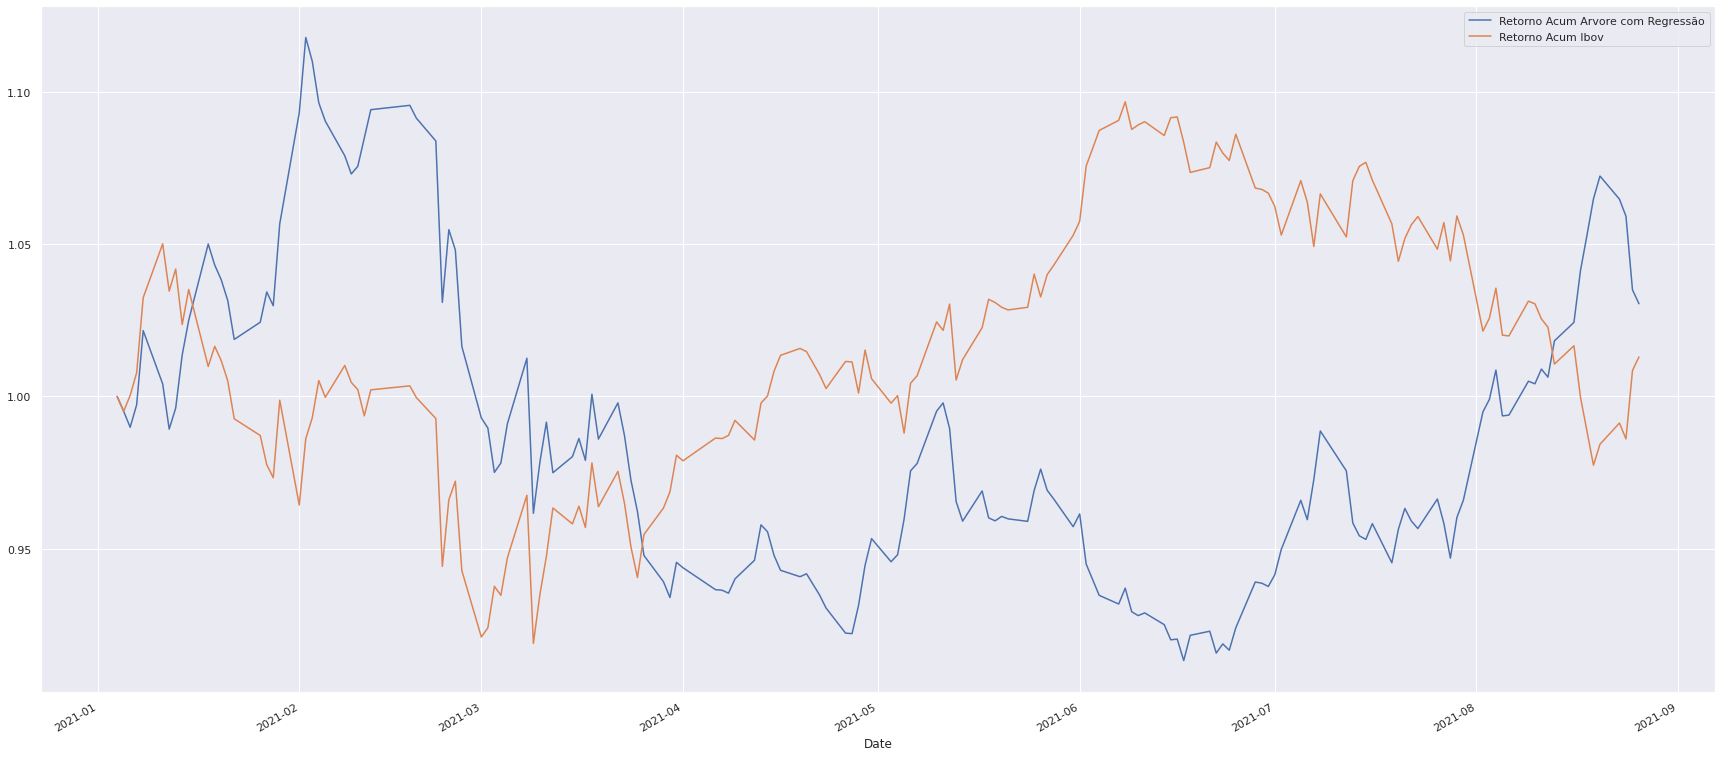

In [76]:
arvore_regressao[['Retorno Acum Arvore com Regressão', 'Retorno Acum Ibov']].plot()

In [77]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision = DecisionTreeRegressor()

In [78]:
regressor_decision.fit(previsores_treinamento_scaler, alvo_treinamento)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [93]:
previsoes_decision = pd.DataFrame(regressor_decision.predict(previsores_teste_scaler))

In [85]:
def trade_2(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Decision'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Decision'] = (1 + trade['Retornos Decision']).cumprod()
  trade['Retorno Acum Decision'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [94]:
decision = trade_2(previsoes_decision)

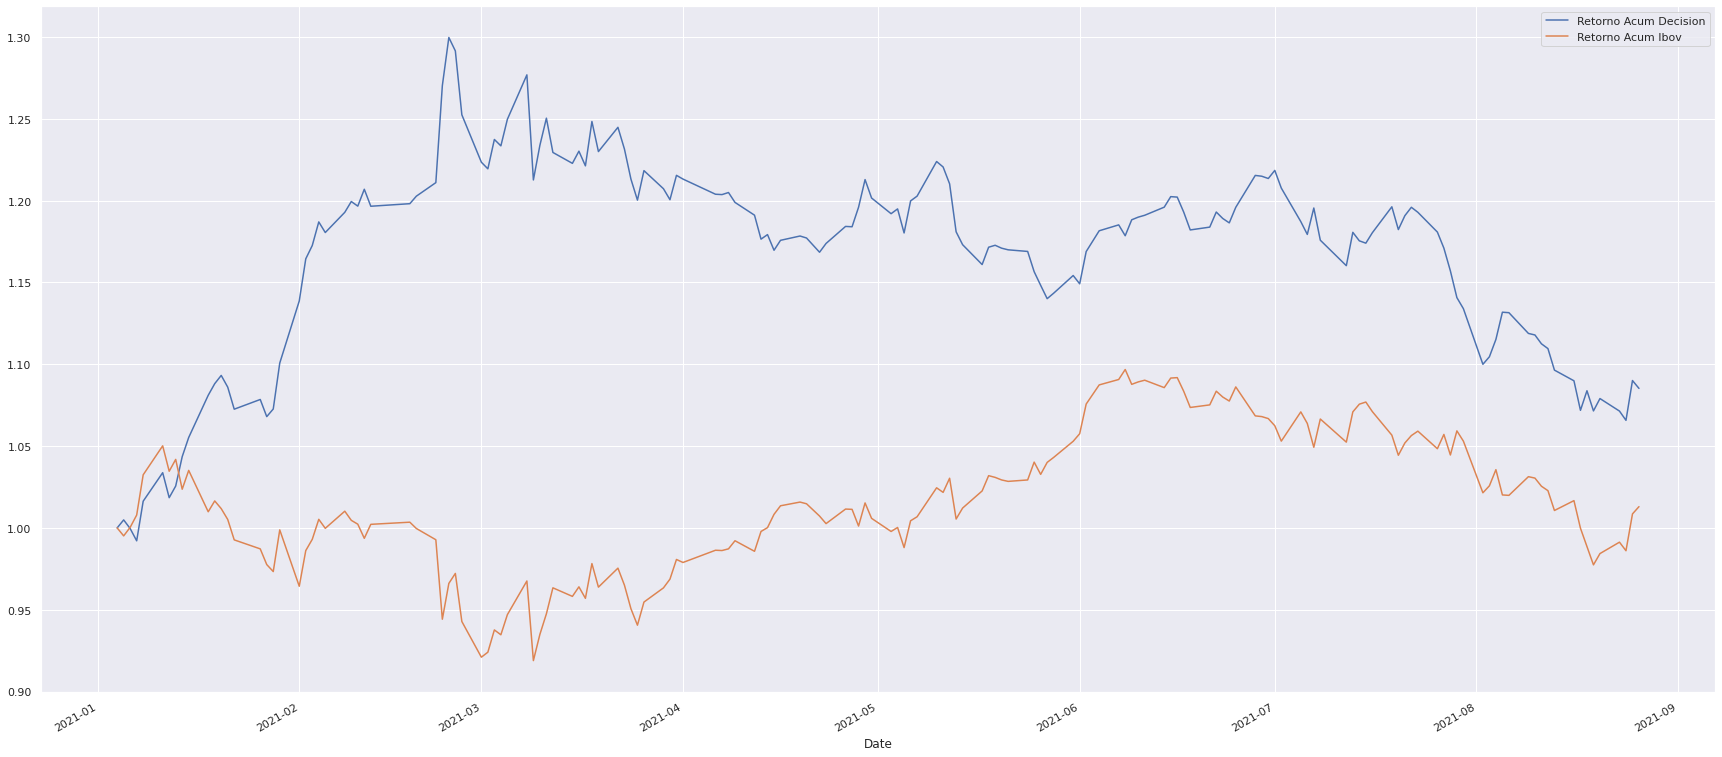

In [95]:
decision[['Retorno Acum Decision', 'Retorno Acum Ibov']].plot()

In [89]:
alvo_teste_class = np.where(alvo_teste.pct_change()<0, -1, 1)
alvo_treinamento_class = np.where(alvo_treinamento.pct_change()<0, -1, 1)

In [92]:
from sklearn.linear_model import LogisticRegression
classificador_log = LogisticRegression()
classificador_log.fit(previsores_treinamento, alvo_treinamento_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
previsoes_reg_log = pd.DataFrame(classificador_log.predict(previsores_teste_scaler))

In [179]:
def trade_3(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Regre Log'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Regre Log'] = (1 + trade['Retornos Regre Log']).cumprod()
  trade['Retorno Acum Regre Log'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [180]:
regre_log = trade_3(previsoes_reg_log)

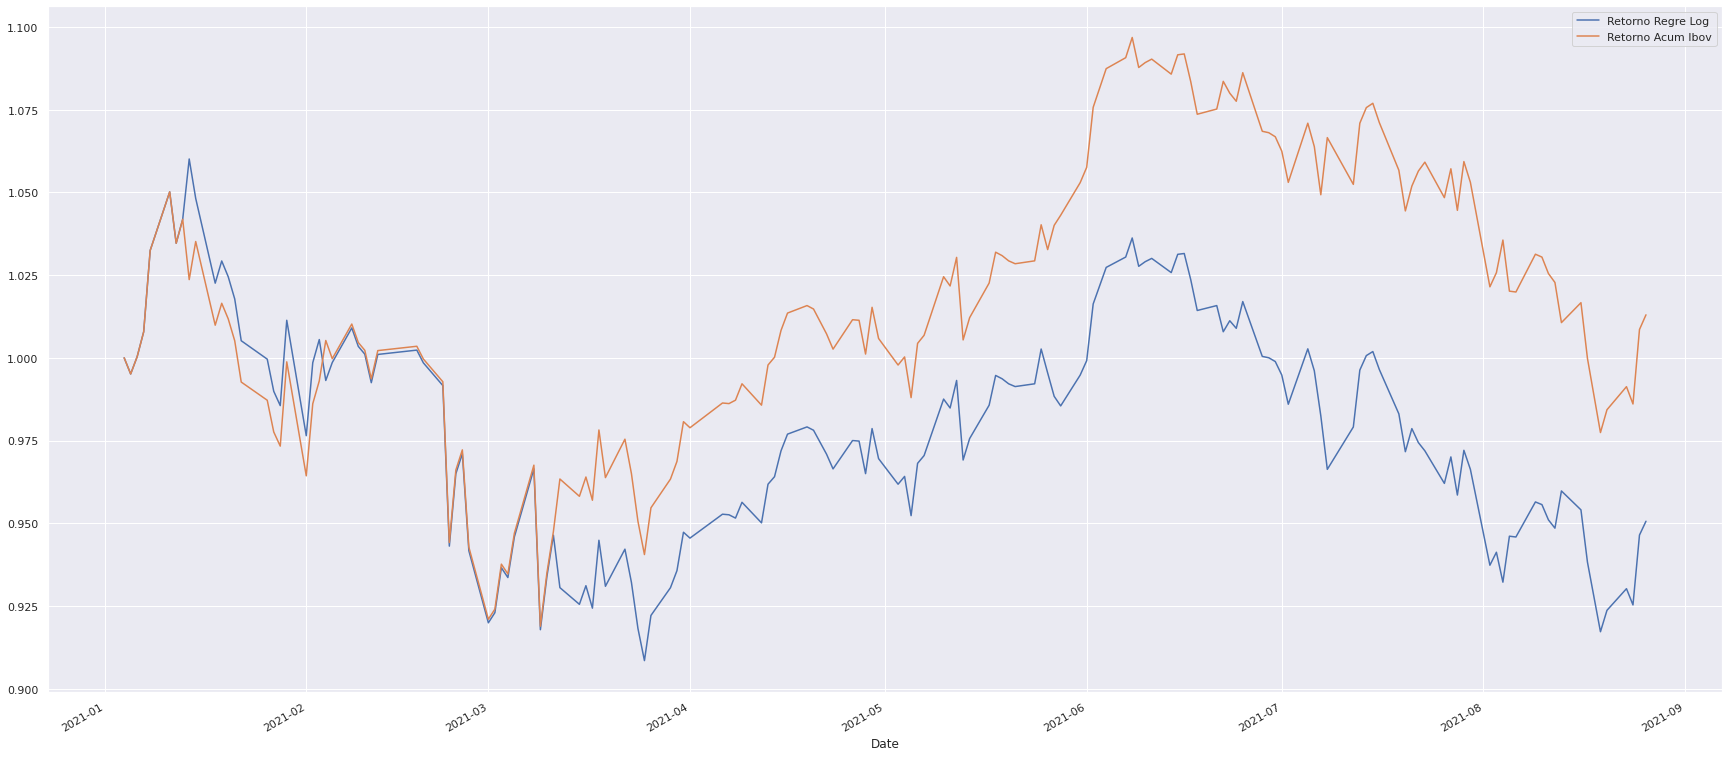

In [100]:
regre_log[['Retorno Regre Log', 'Retorno Acum Ibov']].plot()

In [102]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(previsores_treinamento_scaler, alvo_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
previsoes_linear = pd.DataFrame(regressor_linear.predict(previsores_teste_scaler))

In [174]:
def trade_4(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Regre Linear'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Regre Linear'] = (1 + trade['Retornos Regre Linear']).cumprod()
  trade['Retorno Acum Regre Linear'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [175]:
regre_linear = trade_4(previsoes_linear)

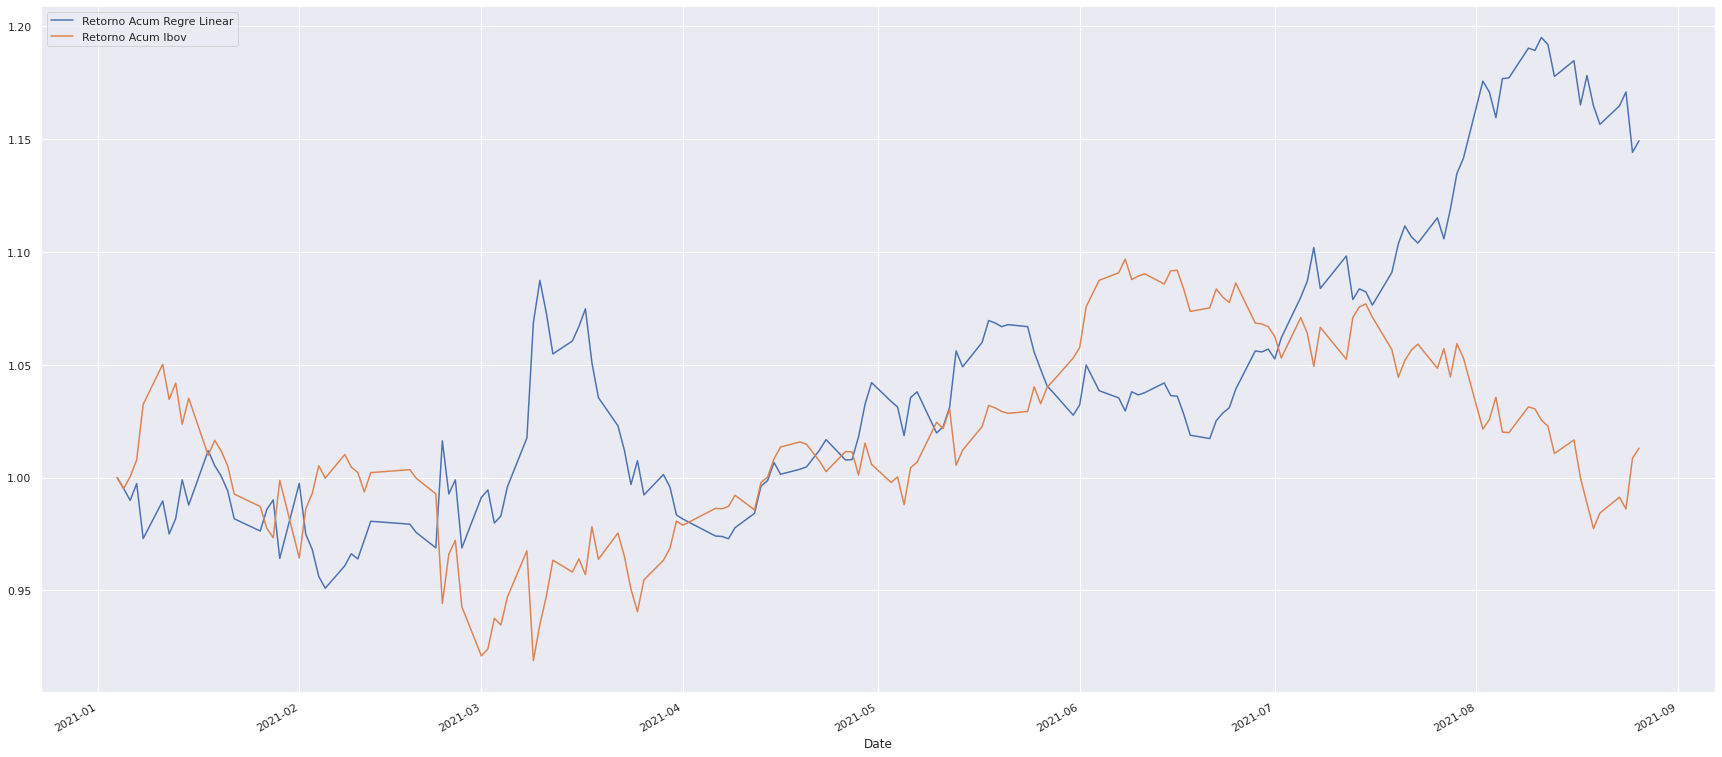

In [123]:
regre_linear[['Retorno Acum Regre Linear', 'Retorno Acum Ibov']].plot()

In [111]:
from sklearn.svm import SVR 
regressor_SVR = SVR(kernel = 'linear')       
regressor_SVR.fit(previsores_treinamento_scaler, alvo_treinamento)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [112]:
previsoes_SVR = pd.DataFrame(regressor_SVR.predict(previsores_teste_scaler))

In [125]:
def trade_5(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos SVR'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum SVR'] = (1 + trade['Retornos SVR']).cumprod()
  trade['Retorno Acum SVR'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [126]:
regre_SVR = trade_5(previsoes_SVR)

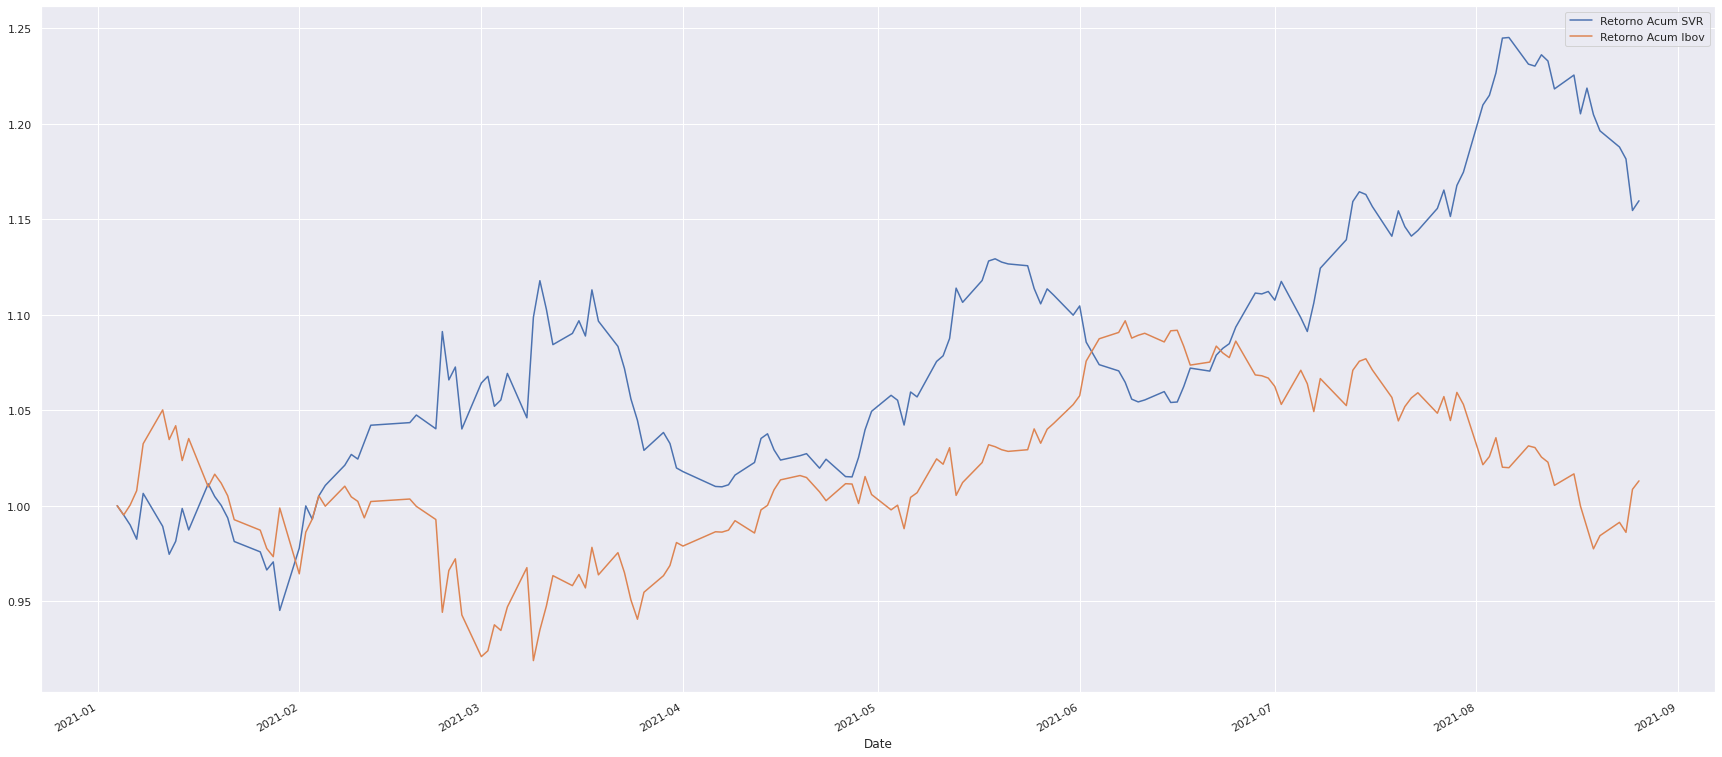

In [127]:
regre_SVR[['Retorno Acum SVR', 'Retorno Acum Ibov']].plot()

In [119]:
from sklearn.neural_network import MLPRegressor
regressor_rede = MLPRegressor(hidden_layer_sizes = (50,25, 10, 4))
regressor_rede.fit(previsores_treinamento_scaler, alvo_treinamento)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 25, 10, 4), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [118]:
previsoes_rede = pd.DataFrame(regressor_rede.predict(previsores_teste_scaler))

In [120]:
def trade_6(previsoes):

  trade = pd.DataFrame()

  lista = []

  for i in range(len(previsoes)):

    if previsoes.pct_change()[0][i] < 0:
      lista.append(-1)
    else:
      lista.append(1)

  trade['Regra'] = lista

  trade['Retornos ibov'] = alvo_teste.pct_change().values

  trade['Retornos Previsão'] = previsoes.pct_change()

  trade['Retornos Rede_Neural'] = trade['Retornos ibov'] * trade['Regra']

  trade['Retorno Acum Ibov'] = (1 + trade['Retornos ibov']).cumprod()
  trade['Retorno Acum Ibov'][0] = 1

  trade['Retorno Acum Rede_Neural'] = (1 + trade['Retornos Rede_Neural']).cumprod()
  trade['Retorno Acum Rede_Neural'][0] = 1

  trade.index = alvo_teste.index

  return trade

In [131]:
rede_neural = trade_6(previsoes_rede)

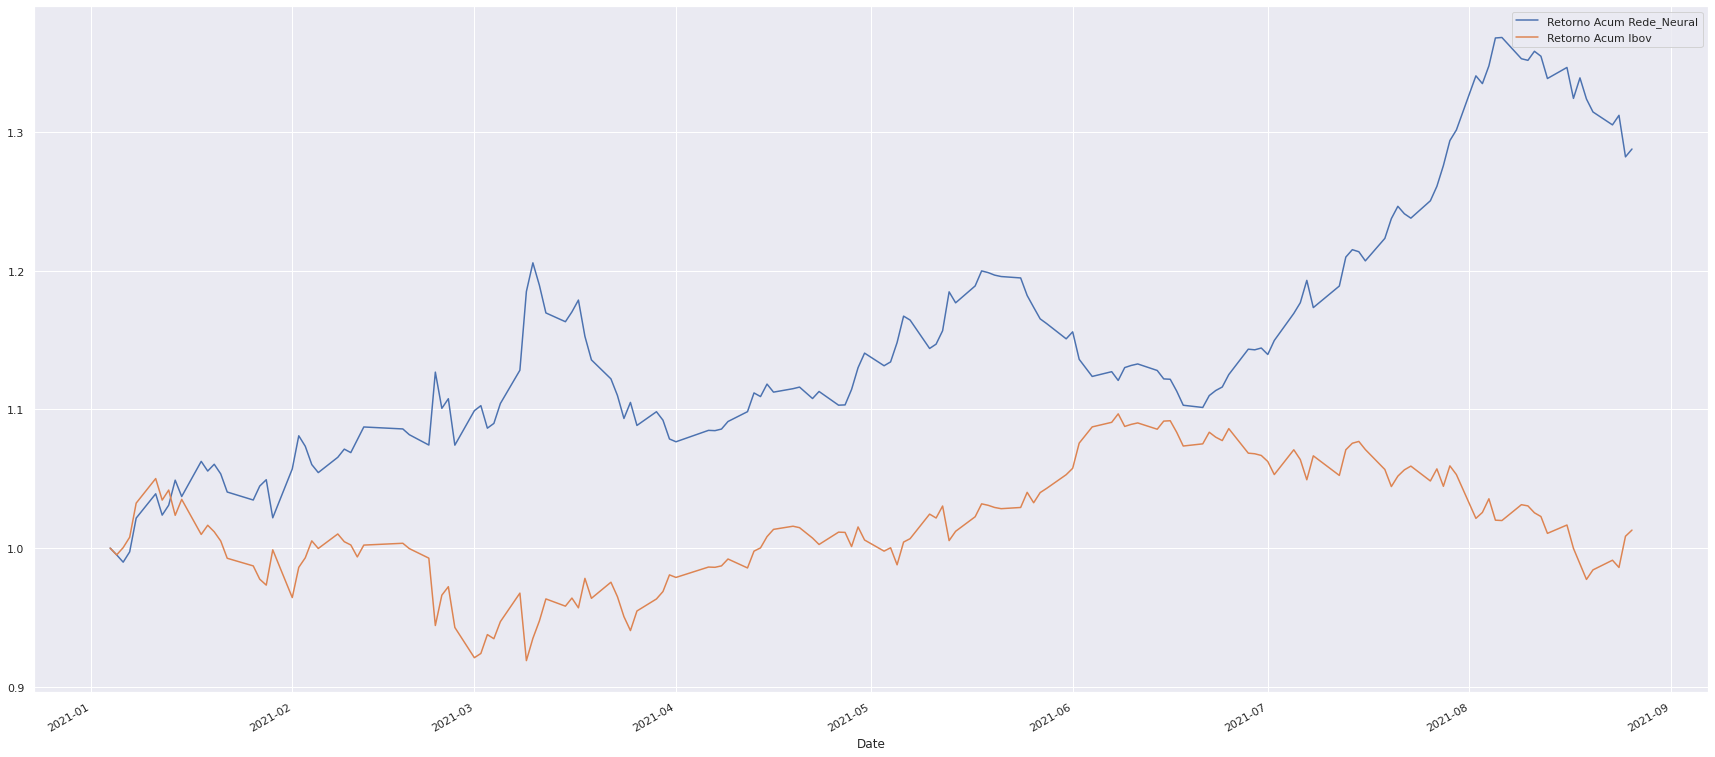

In [132]:
rede_neural[['Retorno Acum Rede_Neural', 'Retorno Acum Ibov']].plot()

In [ ]:
rede_neural[['Retorno Acum Rede_Neural', 'Retorno Acum Ibov']],
regre_SVR[['Retorno Acum SVR', 'Retorno Acum Ibov']],
regre_linear[['Retorno Acum Regre Linear', 'Retorno Acum Ibov']],
regre_log[['Retorno Regre Log', 'Retorno Acum Ibov']],
decision[['Retorno Acum Decision', 'Retorno Acum Ibov']],
arvore_regressao[['Retorno Acum Arvore com Regressão', 'Retorno Acum Ibov']]

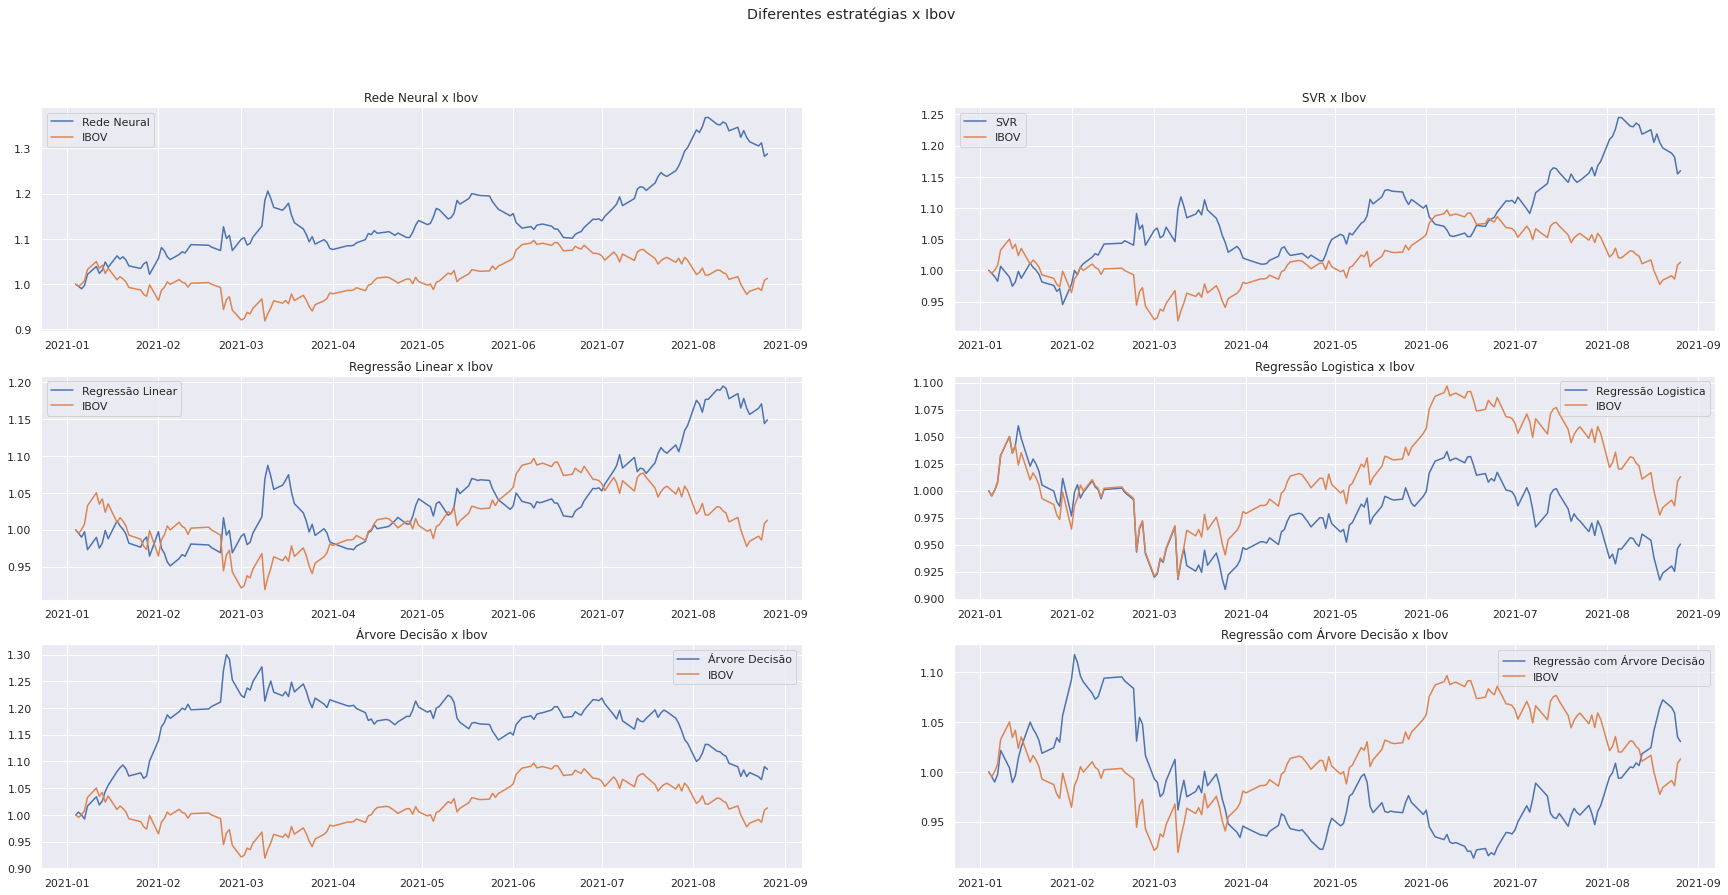

In [148]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

fig.suptitle('Diferentes estratégias x Ibov')

#REDE NEURAL
ax1.plot(rede_neural.index,  rede_neural['Retorno Acum Rede_Neural'], label = "Rede Neural")
ax1.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax1.set_title("Rede Neural x Ibov")
ax1.legend()

#SVR
ax2.plot(rede_neural.index,  regre_SVR['Retorno Acum SVR'], label = "SVR")
ax2.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax2.set_title("SVR x Ibov")
ax2.legend()

#REGRESSÃO LINEAR
ax3.plot(rede_neural.index,  regre_linear['Retorno Acum Regre Linear'], label = "Regressão Linear")
ax3.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax3.set_title("Regressão Linear x Ibov")
ax3.legend()

#REGRESSÃO LOGISTICA
ax4.plot(rede_neural.index,  regre_log['Retorno Regre Log'], label = "Regressão Logistica")
ax4.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax4.set_title("Regressão Logistica x Ibov")
ax4.legend()

#DecisionTree
ax5.plot(rede_neural.index,  decision['Retorno Acum Decision'], label = "Árvore Decisão")
ax5.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax5.set_title("Árvore Decisão x Ibov")
ax5.legend()

#Regressão Com DecisonTree
ax6.plot(rede_neural.index,  arvore_regressao['Retorno Acum Arvore com Regressão'], label = "Regressão com Árvore Decisão")
ax6.plot(rede_neural.index,  rede_neural['Retorno Acum Ibov'],  label = "IBOV")
ax6.set_title("Regressão com Árvore Decisão x Ibov")
ax6.legend()

In [160]:
neutra = np.where(rede_neural['Retorno Acum Rede_Neural']<0, 1 ,1)

In [153]:
import plotly.graph_objects as go

In [162]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = rede_neural.index, y = rede_neural['Retorno Acum Rede_Neural'], mode='lines', name="Rede Neural"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  regre_SVR['Retorno Acum SVR'], mode='lines', name="SVR"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  regre_linear['Retorno Acum Regre Linear'], mode='lines', name="Regressão Linear"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  regre_log['Retorno Regre Log'], mode='lines', name="Regressão Logística"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  decision['Retorno Acum Decision'], mode='lines', name="Árvore Decisão"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  arvore_regressao['Retorno Acum Arvore com Regressão'], mode='lines', name="Regressão com Árvore Decisão"))
fig.add_trace(go.Scatter(x = rede_neural.index, y =  neutra, mode='lines', name="Neutro"))


fig.update_layout(title = 'Estratégias', xaxis_title = "Data", yaxis_title = "Retorno")
fig.show()

In [181]:
estrategias = pd.concat([rede_neural, regre_SVR, regre_linear, regre_log, decision, arvore_regressao], axis = 1)

In [182]:
estrategias

,Regra,Retornos ibov,Retornos Previsão,Retornos Rede_Neural,Retorno Acum Ibov,Retorno Acum Rede_Neural,Regra,Retornos ibov,Retornos Previsão,Retornos SVR,Retorno Acum Ibov,Retorno Acum SVR,Regra,Retornos ibov,Retornos Previsão,Retornos Regre Linear,Retorno Acum Ibov,Retorno Acum Regre Linear,Regra,Retornos ibov,Retornos Previsão,Retornos Regre Log,Retorno Acum Ibov,Retorno Acum Regre Log,Regra,Retornos ibov,Retornos Previsão,Retornos Decision,Retorno Acum Ibov,Retorno Acum Decision,Regra,Retornos ibov,Retornos Previsão,Retornos Arvore com Regressão,Retorno Acum Ibov,Retorno Acum Arvore com Regressão
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1,NaN,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,1.000000,1.000000,1,NaN,NaN,NaN,1.000000,1.000000
2021-01-05,1,-0.004884,0.068728,-0.004884,0.995116,0.995116,1,-0.004884,0.035205,-0.004884,0.995116,0.995116,1,-0.004884,0.039485,-0.004884,0.995116,0.995116,1,-0.004884,0.0,-0.004884,0.995116,0.995116,-1,-0.004884,-0.092372,0.004884,0.995116,1.004884,1,-0.004884,0.059510,-0.004884,0.995116,0.995116
2021-01-06,-1,0.005259,-0.089409,-0.005259,1.000349,0.989882,-1,0.005259,-0.016484,-0.005259,1.000349,0.989882,-1,0.005259,-0.090911,-0.005259,1.000349,0.989882,1,0.005259,0.0,0.005259,1.000349,1.000349,-1,0.005259,-0.053378,-0.005259,1.000349,0.999600,-1,0.005259,-0.012378,-0.005259,1.000349,0.989882
2021-01-07,1,0.007498,0.004315,0.007498,1.007850,0.997305,-1,0.007498,-0.003594,-0.007498,1.007850,0.982460,1,0.007498,0.052001,0.007498,1.007850,0.997305,1,0.007498,0.0,0.007498,1.007850,1.007850,-1,0.007498,-0.023385,-0.007498,1.007850,0.992104,1,0.007498,0.004782,0.007498,1.007850,0.997305
2021-01-08,1,0.024405,0.010359,0.024405,1.032447,1.021644,1,0.024405,0.002851,0.024405,1.032447,1.006436,-1,0.024405,-0.034206,-0.024405,1.032447,0.972966,1,0.024405,0.0,0.024405,1.032447,1.032447,1,0.024405,0.000000,0.024405,1.032447,1.016317,1,0.024405,0.002211,0.024405,1.032447,1.021644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,-1,0.007050,-0.054022,-0.007050,0.984300,1.314507,-1,0.007050,-0.062475,-0.007050,0.984300,1.196281,-1,0.007050,-0.028665,-0.007050,0.984300,1.156501,1,0.007050,0.0,0.007050,0.984300,0.923674,1,0.007050,0.000000,0.007050,0.984300,1.079055,1,0.007050,0.024290,0.007050,0.984300,1.072422
2021-08-23,-1,0.007089,-0.009785,-0.007089,0.991278,1.305188,-1,0.007089,-0.025156,-0.007089,0.991278,1.187801,1,0.007089,0.023313,0.007089,0.991278,1.164700,1,0.007089,0.0,0.007089,0.991278,0.930222,-1,0.007089,-0.131037,-0.007089,0.991278,1.071405,-1,0.007089,-0.008390,-0.007089,0.991278,1.064820
2021-08-24,-1,-0.005279,-0.025012,0.005279,0.986044,1.312079,1,-0.005279,0.009072,-0.005279,0.986044,1.181530,-1,-0.005279,-0.025795,0.005279,0.986044,1.170848,1,-0.005279,0.0,-0.005279,0.986044,0.925311,1,-0.005279,0.214536,-0.005279,0.986044,1.065749,1,-0.005279,0.001546,-0.005279,0.986044,1.059198


In [184]:
estrategias.drop(columns = ['Regra', 'Retornos ibov', 'Retornos Previsão', 'Retorno Acum Ibov'], inplace = True)

In [185]:
estrategias

,Retornos Rede_Neural,Retorno Acum Rede_Neural,Retornos SVR,Retorno Acum SVR,Retornos Regre Linear,Retorno Acum Regre Linear,Retornos Regre Log,Retorno Acum Regre Log,Retornos Decision,Retorno Acum Decision,Retornos Arvore com Regressão,Retorno Acum Arvore com Regressão
Date,,,,,,,,,,,,
2021-01-04,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000
2021-01-05,-0.004884,0.995116,-0.004884,0.995116,-0.004884,0.995116,-0.004884,0.995116,0.004884,1.004884,-0.004884,0.995116
2021-01-06,-0.005259,0.989882,-0.005259,0.989882,-0.005259,0.989882,0.005259,1.000349,-0.005259,0.999600,-0.005259,0.989882
2021-01-07,0.007498,0.997305,-0.007498,0.982460,0.007498,0.997305,0.007498,1.007850,-0.007498,0.992104,0.007498,0.997305
2021-01-08,0.024405,1.021644,0.024405,1.006436,-0.024405,0.972966,0.024405,1.032447,0.024405,1.016317,0.024405,1.021644
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-20,-0.007050,1.314507,-0.007050,1.196281,-0.007050,1.156501,0.007050,0.923674,0.007050,1.079055,0.007050,1.072422
2021-08-23,-0.007089,1.305188,-0.007089,1.187801,0.007089,1.164700,0.007089,0.930222,-0.007089,1.071405,-0.007089,1.064820
2021-08-24,0.005279,1.312079,-0.005279,1.181530,0.005279,1.170848,-0.005279,0.925311,-0.005279,1.065749,-0.005279,1.059198


In [205]:
pd.DataFrame(estrategias.iloc[:, [0,2,4,6,8,10]].std()*np.sqrt(252) * 100, columns = ["Vol"])

,Vol
Retornos Rede_Neural,19.954505
Retornos SVR,20.066472
Retornos Regre Linear,20.073550
Retornos Regre Log,20.127369
Retornos Decision,20.108675
Retornos Arvore com Regressão,20.126385


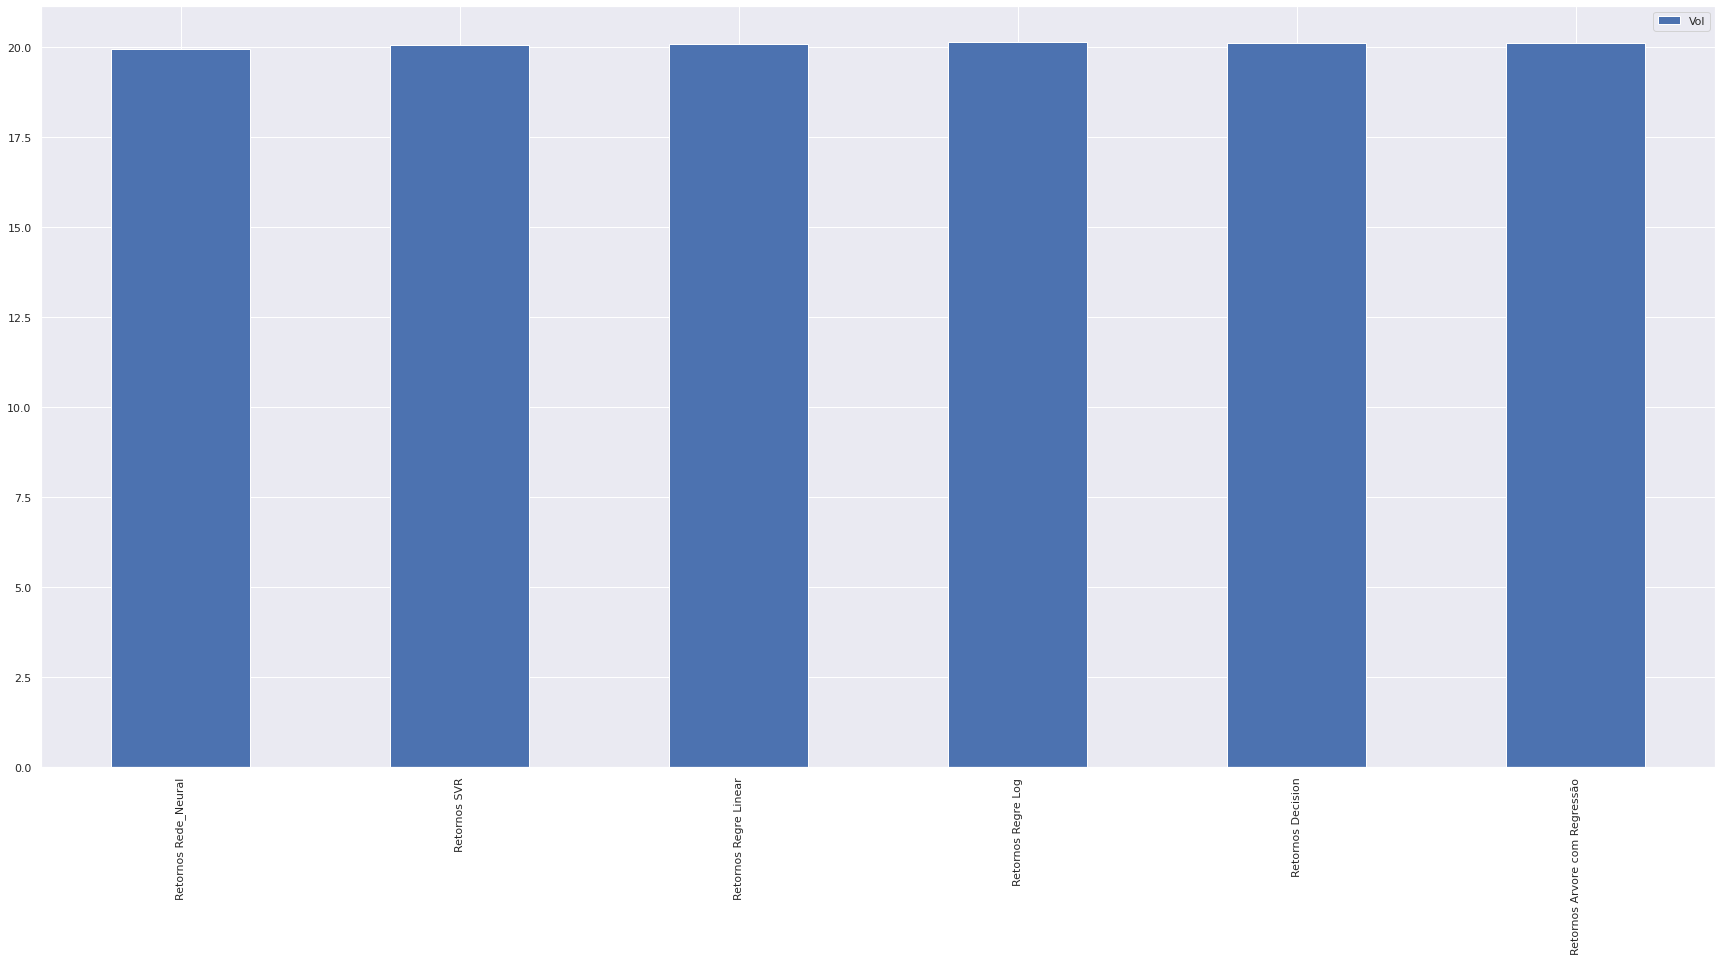

In [207]:

pd.DataFrame(estrategias.iloc[:, [0,2,4,6,8,10]].std()*np.sqrt(252) * 100, columns = ["Vol"]).plot.bar()

In [220]:
pd.DataFrame(estrategias.iloc[:, [1,3,5,7,9,11]].iloc[len(estrategias)-1] - estrategias.iloc[:, [1,3,5,7,9,11]].iloc[0], columns = ["Retorno Total"])

,Retorno Total
Retorno Acum Rede_Neural,0.287790
Retorno Acum SVR,0.159658
Retorno Acum Regre Linear,0.149174
Retorno Acum Regre Log,-0.049397
Retorno Acum Decision,0.085263
Retorno Acum Arvore com Regressão,0.030460


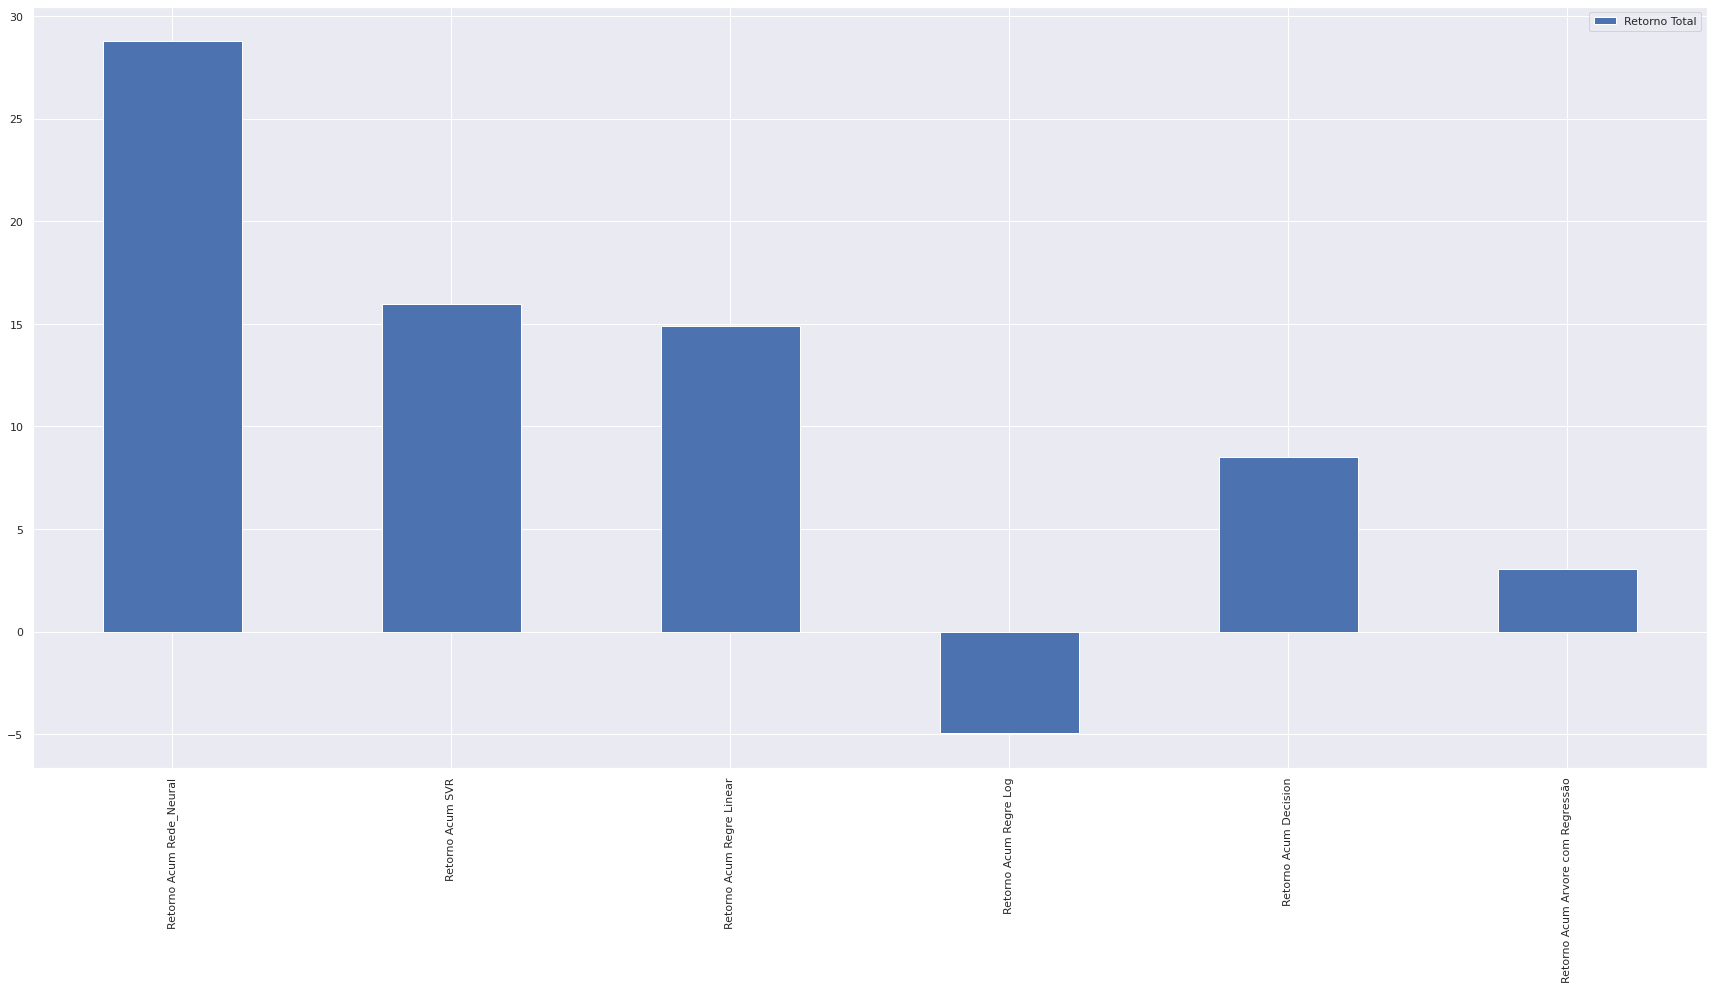

In [225]:
pd.DataFrame((estrategias.iloc[:, [1,3,5,7,9,11]].iloc[len(estrategias)-1] - estrategias.iloc[:, [1,3,5,7,9,11]].iloc[0]) * 100, columns = ["Retorno Total"]).plot.bar()